In [1]:
# import sys
# print(sys.executable)
# print(sys.version)

import os
os.environ['PROJ_LIB'] = '/home/jlee/.conda/envs/mmc_sgp/share/proj'

import wrf
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import xarray as xr
from numba import njit

wrf_runs_dir = '/projects/mmc/jlee/sgp/wrf-mmc/wrf-runs/'
nb_dir = !pwd
data_dir_df = pd.read_csv(nb_dir[0]+'/data-dir-j3leswrf.csv', index_col=0)
# plots_dir = nb_dir[0]+'/plots_04a'

runs_list = list(data_dir_df.index)[:-1]

In [103]:
data_dir_df

,2018-08-05,2018-09-01
mynn,a1_0805m_30s,o1_0901m_30s
mynn_ck0.1,l7_0805m-ck,NaN
edmf,a2_0805e_30s,o2_0901e_30s
mynn_all4d-1arcs-topo,l5_0805m,NaN
mynn_d12-9s_d34-1s,a5_0805m_9s1s,o5_0901m_9s1s
mynn_d123-9s_d4-1s_lu,n2_d123-9s_d4-1s,NaN
mynn_all4d-9arcs_lu,n3_9s,NaN
edmf_d12-9s_d34-1s,a6_0805e_9s1s,o6_0901e_9s1s
wrf_start,8/4/18 12:00,8/31/18 12:00


## cloud fraction

In [13]:
eval_date = '2018-08-05'
run = 'mynn'

date_col = data_dir_df[eval_date]

for ind, hr in enumerate(np.arange(14, 24, 1)): 

    file = wrf_runs_dir+date_col[run]+'/auxout/original_run/mmc_d02_'+eval_date+'_'+str(hr)+':00:00'
    wrf_single = Dataset(file, 'r')

    var = wrf.getvar(wrf_single, 'CLDFRA', timeidx=wrf.ALL_TIMES)
    
    # d04 grid cells in d02
    var_edmf_cells = var[:, :, 121:126, 119:123]

#     height = wrf.getvar(wrf_single, 'height_agl').mean(dim=['south_north', 'west_east'])[hgt_i]
#     height_str = str(int(height.values))

    if ind == 0: 
        var_all = var_edmf_cells
    else: 
        var_all = xr.concat([var_all, var_edmf_cells], dim='Time')

In [24]:
area_mean = var_all.mean(axis=2).mean(axis=2)

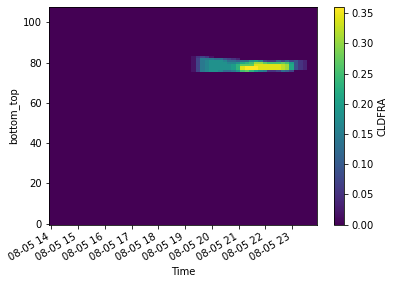

In [27]:
area_mean.T.plot()

In [28]:
eval_date = '2018-09-01'
run = 'mynn'

date_col = data_dir_df[eval_date]

for ind, hr in enumerate(np.arange(14, 24, 1)): 

    file = wrf_runs_dir+date_col[run]+'/auxout/mmc_d02_'+eval_date+'_'+str(hr)+':00:00'
    wrf_single = Dataset(file, 'r')

    var = wrf.getvar(wrf_single, 'CLDFRA', timeidx=wrf.ALL_TIMES)
    
    # d04 grid cells in d02
    var_edmf_cells = var[:, :, 121:126, 119:123]

#     height = wrf.getvar(wrf_single, 'height_agl').mean(dim=['south_north', 'west_east'])[hgt_i]
#     height_str = str(int(height.values))

    if ind == 0: 
        var_all = var_edmf_cells
    else: 
        var_all = xr.concat([var_all, var_edmf_cells], dim='Time')

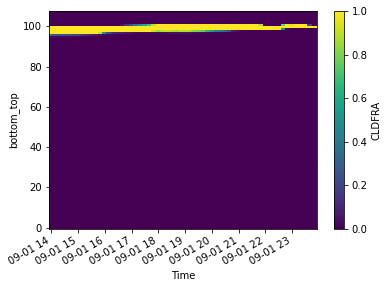

In [29]:
area_mean = var_all.mean(axis=2).mean(axis=2)
area_mean.T.plot()

## w

In [139]:
top_hgt = 40

def plot_avg_w_timeheight(eval_date, run, top_hgt):

    date_col = data_dir_df[eval_date]

    for ind, hr in enumerate(np.arange(16, 20, 1)): 

        file = wrf_runs_dir+date_col[run]+'/auxout/original_run/mmc_d02_'+eval_date+'_'+str(hr)+':00:00'
#         print(file)
        wrf_single = Dataset(file, 'r')

        var = wrf.getvar(wrf_single, 'W', timeidx=wrf.ALL_TIMES)
        w = wrf.destagger(var, 1, meta=True)
        w = w.assign_coords(var.coords)

        # d04 grid cells in d02
        w_edmf_cells = w[:, 0:top_hgt, 121:126, 119:123]

        if ind == 0: 
            w_all = w_edmf_cells
            height = wrf.getvar(wrf_single, 'height_agl').mean(dim=['south_north', 'west_east'])[0:top_hgt]

        else: 
            w_all = xr.concat([w_all, w_edmf_cells], dim='Time')

    w_all = w_all.assign_coords(bottom_top=('bottom_top', height.values))

    w_area_mean = w_all.mean(axis=2).mean(axis=2)

    w_area_mean.T.plot(vmin=-0.02, vmax=0.02, cmap='coolwarm')
    plt.title(run+': d04 cells in d02 avg w')

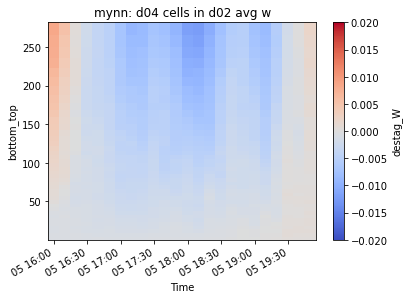

In [140]:
plot_avg_w_timeheight('2018-08-05', 'mynn', top_hgt)

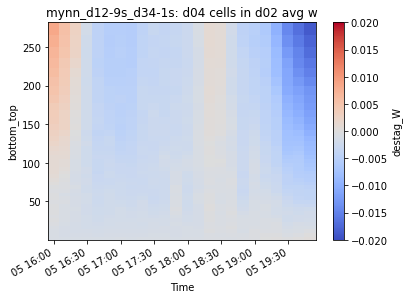

In [141]:
plot_avg_w_timeheight('2018-08-05', 'mynn_d12-9s_d34-1s', top_hgt)

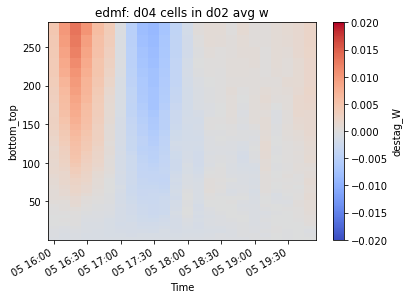

In [142]:
plot_avg_w_timeheight('2018-08-05', 'edmf', top_hgt)

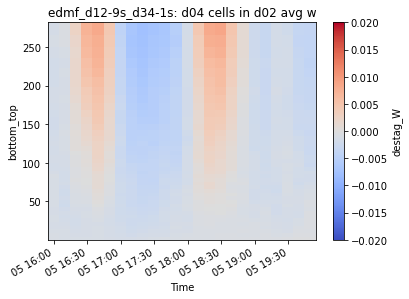

In [143]:
plot_avg_w_timeheight('2018-08-05', 'edmf_d12-9s_d34-1s', top_hgt)

In [144]:
def plot_avg_w_timeheight_d04(eval_date, run, top_hgt):

    date_col = data_dir_df[eval_date]

    for ind, hr in enumerate(np.arange(16, 20, 1)): 

        file = wrf_runs_dir+date_col[run]+'/auxout/original_run/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
        wrf_single = Dataset(file, 'r')

        var = wrf.getvar(wrf_single, 'W', timeidx=wrf.ALL_TIMES)
        w = wrf.destagger(var, 1, meta=True)
        w = w.assign_coords(var.coords)

        # d04 grid cells in d02
        w_edmf_cells = w[:, 0:top_hgt, 121:126, 119:123]

        if ind == 0: 
            w_all = w_edmf_cells
            height = wrf.getvar(wrf_single, 'height_agl').mean(dim=['south_north', 'west_east'])[0:top_hgt]

        else: 
            w_all = xr.concat([w_all, w_edmf_cells], dim='Time')

    w_all = w_all.assign_coords(bottom_top=('bottom_top', height.values))

    w_area_mean = w_all.mean(axis=2).mean(axis=2)

    w_area_mean.T.plot(vmin=-4, vmax=4, cmap='coolwarm')
    plt.title(run+': d04 avg w')

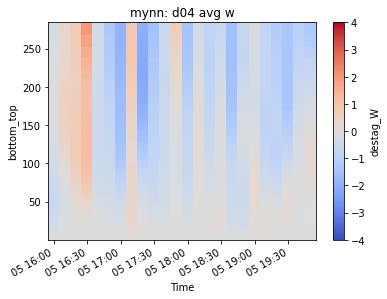

In [145]:
plot_avg_w_timeheight_d04('2018-08-05', 'mynn', top_hgt)

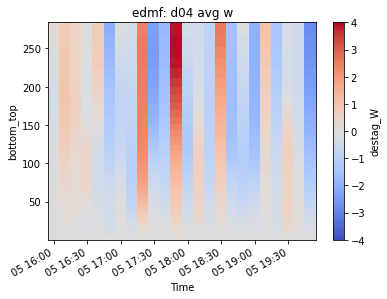

In [147]:
plot_avg_w_timeheight_d04('2018-08-05', 'edmf', top_hgt)

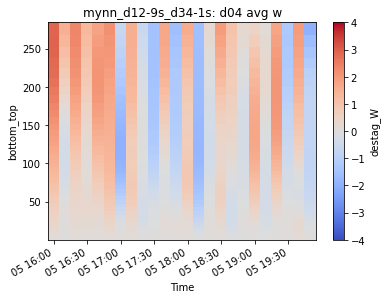

In [146]:
plot_avg_w_timeheight_d04('2018-08-05', 'mynn_d12-9s_d34-1s', top_hgt)

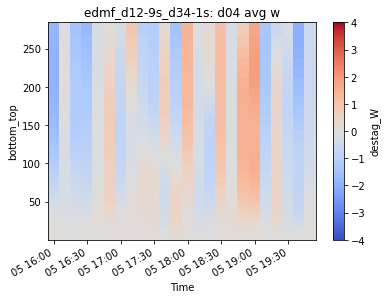

In [148]:
plot_avg_w_timeheight_d04('2018-08-05', 'edmf_d12-9s_d34-1s', top_hgt)

### 60 minute w

In [288]:
def plot_w_timeheight_d04_60(eval_date, run, top_hgt):

    date_col = data_dir_df[eval_date]

    for ind, hr in enumerate(np.arange(16, 20, 1)): 
        
        for minute in np.arange(0, 60, 10):
            
            if minute == 0:
                min_s = '00'
            else:
                min_s = str(minute)

            file = wrf_runs_dir+date_col[run]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':'+min_s+':00'
#             print(file)
            wrf_single = Dataset(file, 'r')

            var = wrf.getvar(wrf_single, 'W', timeidx=wrf.ALL_TIMES)
            w = wrf.destagger(var, 1, meta=True)
            w = w.assign_coords(var.coords)

            # d04 grid cells in d02
            w_edmf_cells = w[:, 0:top_hgt, 121:126, 119:123]

            if ind == 0 and minute == 0: 
                w_all = w_edmf_cells
                height = wrf.getvar(wrf_single, 'height_agl').mean(dim=['south_north', 'west_east'])[0:top_hgt]

            else: 
                w_all = xr.concat([w_all, w_edmf_cells], dim='Time')

    w_all = w_all.assign_coords(bottom_top=('bottom_top', height.values))

    w_area_mean = w_all.mean(axis=2).mean(axis=2)

    w_area_mean.T.plot()
    plt.title(run+': d04 avg w')
    
    return w_area_mean

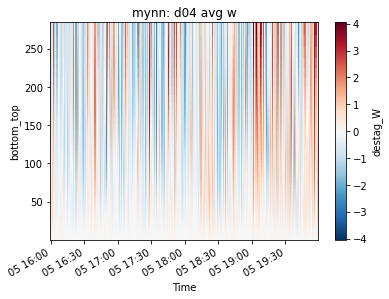

In [290]:
w_60_mynn = plot_w_timeheight_d04_60('2018-08-05', 'mynn', top_hgt)

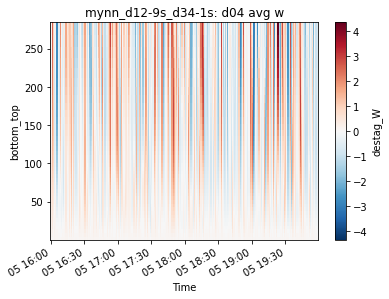

In [289]:
w_60_mynn9s1s = plot_w_timeheight_d04_60('2018-08-05', 'mynn_d12-9s_d34-1s', top_hgt)

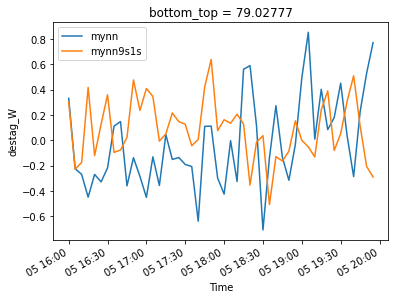

In [291]:
w_60_mynn.resample(Time='5MIN').mean()[:, 16].plot(label='mynn')
w_60_mynn9s1s.resample(Time='5MIN').mean()[:, 16].plot(label='mynn9s1s')
plt.legend()

## w std

In [188]:
# eval_date = '2018-08-05'
# run = 'edmf'

def plot_w_std_timeheight(eval_date, run, top_hgt):

    date_col = data_dir_df[eval_date]

    for ind, hr in enumerate(np.arange(16, 20, 1)): 

        file = wrf_runs_dir+date_col[run]+'/auxout/original_run/mmc_d02_'+eval_date+'_'+str(hr)+':00:00'
    #         print(file)
        wrf_single = Dataset(file, 'r')

        var = wrf.getvar(wrf_single, 'W', timeidx=wrf.ALL_TIMES)
        w = wrf.destagger(var, 1, meta=True)
        w = w.assign_coords(var.coords)

        # d04 grid cells in d02
        w_edmf_cells = w[:, 0:top_hgt, 121:126, 119:123]

        if ind == 0: 
            w_all = w_edmf_cells
            height = wrf.getvar(wrf_single, 'height_agl').mean(dim=['south_north', 'west_east'])[0:top_hgt]

        else: 
            w_all = xr.concat([w_all, w_edmf_cells], dim='Time')

    w_all = w_all.assign_coords(bottom_top=('bottom_top', height.values))

    w_area_std = w_all.std(['south_north', 'west_east'])

    w_area_std.T.plot(vmin=0, vmax=0.17)
    plt.title(run+': d04 cells in d02 w spatial standard dev')

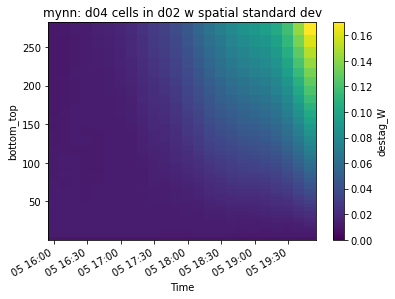

In [189]:
plot_w_std_timeheight('2018-08-05', 'mynn', top_hgt)

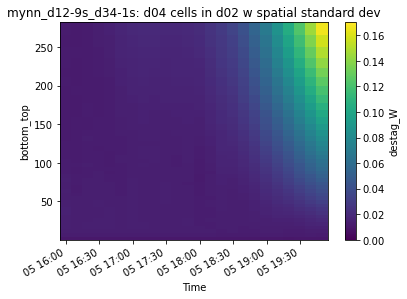

In [190]:
plot_w_std_timeheight('2018-08-05', 'mynn_d12-9s_d34-1s', top_hgt)

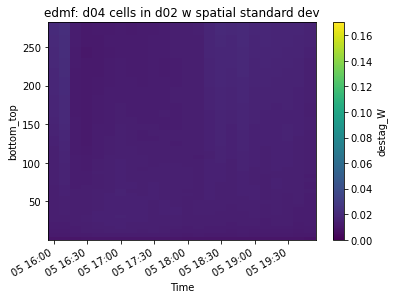

In [191]:
plot_w_std_timeheight('2018-08-05', 'edmf', top_hgt)

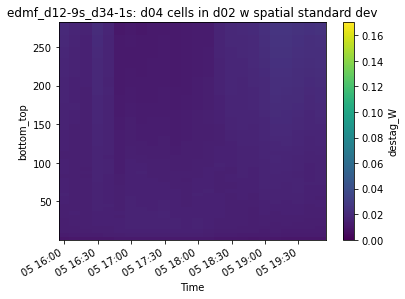

In [192]:
plot_w_std_timeheight('2018-08-05', 'edmf_d12-9s_d34-1s', top_hgt)

In [220]:
def plot_w_std_timeheight_d04(eval_date, run, top_hgt):

    date_col = data_dir_df[eval_date]

    for ind, hr in enumerate(np.arange(16, 20, 1)): 

        file = wrf_runs_dir+date_col[run]+'/auxout/original_run/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
        wrf_single = Dataset(file, 'r')

        var = wrf.getvar(wrf_single, 'W', timeidx=wrf.ALL_TIMES)
        w = wrf.destagger(var, 1, meta=True)
        w = w.assign_coords(var.coords)

        # d04 grid cells in d02
        w_edmf_cells = w[:, 0:top_hgt, 121:126, 119:123]

        if ind == 0: 
            w_all = w_edmf_cells
            height = wrf.getvar(wrf_single, 'height_agl').mean(dim=['south_north', 'west_east'])[0:top_hgt]

        else: 
            w_all = xr.concat([w_all, w_edmf_cells], dim='Time')

    w_all = w_all.assign_coords(bottom_top=('bottom_top', height.values))

    w_area_std = w_all.std(['south_north', 'west_east'])

    w_area_std.T.plot(vmin=0, vmax=2)
    plt.title(run+': d04 w spatial standard dev')
    
    return w_area_std

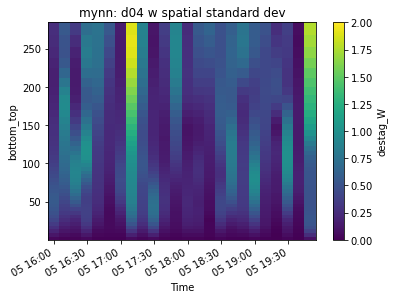

In [221]:
w_std_mynn = plot_w_std_timeheight_d04('2018-08-05', 'mynn', top_hgt)

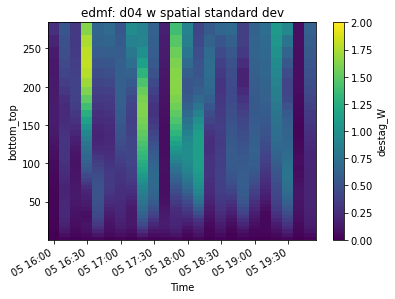

In [227]:
w_std_edmf = plot_w_std_timeheight_d04('2018-08-05', 'edmf', top_hgt)

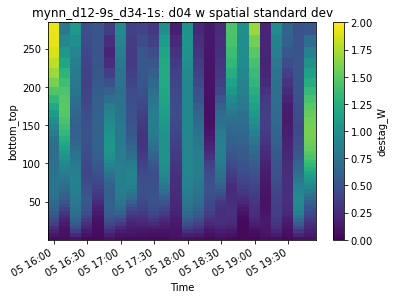

In [231]:
w_std_mynn9s1s = plot_w_std_timeheight_d04('2018-08-05', 'mynn_d12-9s_d34-1s', top_hgt)

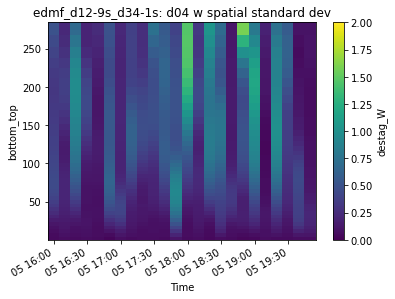

In [232]:
w_std_edmf9s1s = plot_w_std_timeheight_d04('2018-08-05', 'edmf_d12-9s_d34-1s', top_hgt)

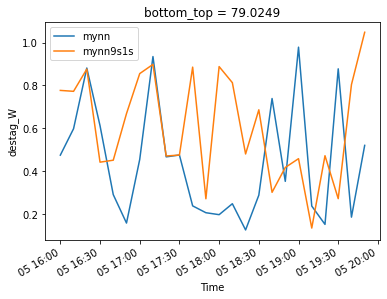

In [235]:
w_std_mynn[:, 16].plot(label='mynn')
# w_std_edmf[:, 16].plot(label='edmf')
w_std_mynn9s1s[:, 16].plot(label='mynn9s1s')
# w_std_edmf9s1s[:, 16].plot(label='edmf9s1s')
plt.legend()

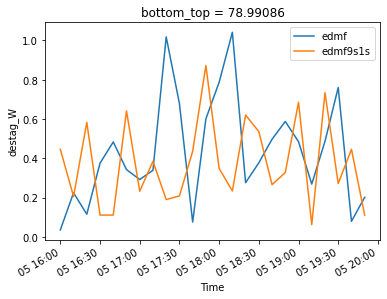

In [234]:
# w_std_mynn[:, 16].plot(label='mynn')
w_std_edmf[:, 16].plot(label='edmf')
# w_std_mynn9s1s[:, 16].plot(label='mynn9s1s')
w_std_edmf9s1s[:, 16].plot(label='edmf9s1s')
plt.legend()

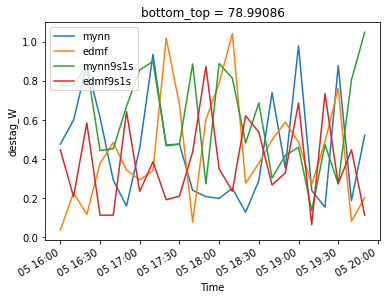

In [293]:
w_std_mynn[:, 16].plot(label='mynn')
w_std_edmf[:, 16].plot(label='edmf')
w_std_mynn9s1s[:, 16].plot(label='mynn9s1s')
w_std_edmf9s1s[:, 16].plot(label='edmf9s1s')
plt.legend()

### 60 minute w std

In [242]:
def plot_w_std_timeheight_d04_60(eval_date, run, top_hgt):

    date_col = data_dir_df[eval_date]

    for ind, hr in enumerate(np.arange(16, 20, 1)): 
        
        for minute in np.arange(0, 60, 10):
            
            if minute == 0:
                min_s = '00'
            else:
                min_s = str(minute)

            file = wrf_runs_dir+date_col[run]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':'+min_s+':00'
#             print(file)
            wrf_single = Dataset(file, 'r')

            var = wrf.getvar(wrf_single, 'W', timeidx=wrf.ALL_TIMES)
            w = wrf.destagger(var, 1, meta=True)
            w = w.assign_coords(var.coords)

            # d04 grid cells in d02
            w_edmf_cells = w[:, 0:top_hgt, 121:126, 119:123]

            if ind == 0 and minute == 0: 
                w_all = w_edmf_cells
                height = wrf.getvar(wrf_single, 'height_agl').mean(dim=['south_north', 'west_east'])[0:top_hgt]

            else: 
                w_all = xr.concat([w_all, w_edmf_cells], dim='Time')

    w_all = w_all.assign_coords(bottom_top=('bottom_top', height.values))

    w_area_std = w_all.std(['south_north', 'west_east'])

    w_area_std.T.plot()
    plt.title(run+': d04 w spatial standard dev')
    
    return w_area_std

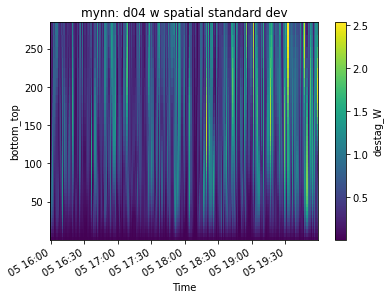

In [246]:
w_60std_mynn = plot_w_std_timeheight_d04_60('2018-08-05', 'mynn', top_hgt)

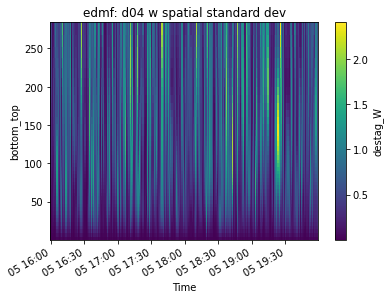

In [243]:
w_60std_edmf = plot_w_std_timeheight_d04_60('2018-08-05', 'edmf', top_hgt)

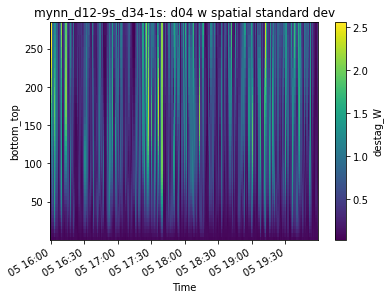

In [244]:
w_60std_mynn9s1s = plot_w_std_timeheight_d04_60('2018-08-05', 'mynn_d12-9s_d34-1s', top_hgt)

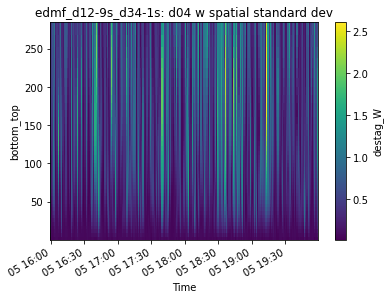

In [245]:
w_60std_edmf9s1s = plot_w_std_timeheight_d04_60('2018-08-05', 'edmf_d12-9s_d34-1s', top_hgt)

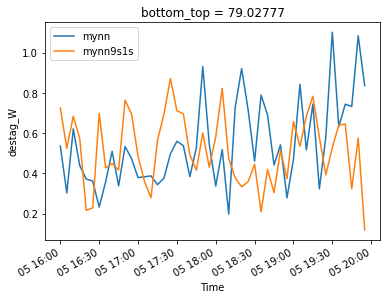

In [285]:
w_60std_mynn.resample(Time='5MIN').mean()[:, 16].plot(label='mynn')
w_60std_mynn9s1s.resample(Time='5MIN').mean()[:, 16].plot(label='mynn9s1s')
plt.legend()

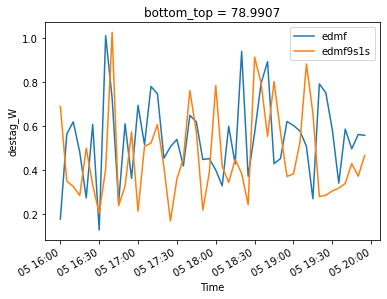

In [286]:
w_60std_edmf.resample(Time='5MIN').mean()[:, 16].plot(label='edmf')
w_60std_edmf9s1s.resample(Time='5MIN').mean()[:, 16].plot(label='edmf9s1s')
plt.legend()

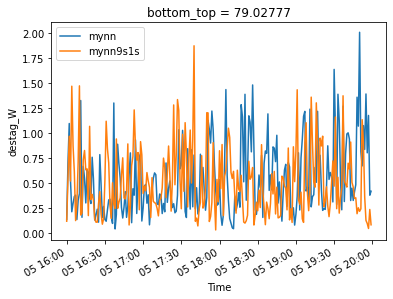

In [249]:
w_60std_mynn[:, 16].plot(label='mynn')
# w_60std_edmf[:, 16].plot(label='edmf')
w_60std_mynn9s1s[:, 16].plot(label='mynn9s1s')
# w_60std_edmf9s1s[:, 16].plot(label='edmf9s1s')
plt.legend()

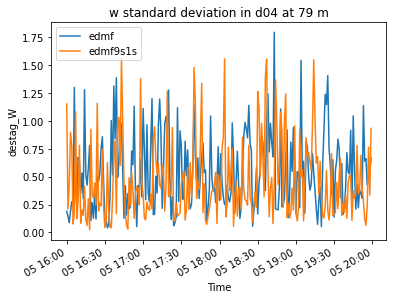

In [305]:
# w_std_mynn[:, 16].plot(label='mynn')
w_60std_edmf[:, 16].plot(label='edmf')
# w_std_mynn9s1s[:, 16].plot(label='mynn9s1s')
w_60std_edmf9s1s[:, 16].plot(label='edmf9s1s')
plt.title('w standard deviation in d04 at 79 m')
plt.legend()

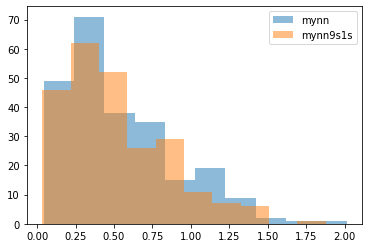

In [262]:
al_pha = 0.5
plt.hist(w_60std_mynn[:, 16], label='mynn', alpha=al_pha)
# plt.hist(w_60std_edmf[:, 16], label='edmf', alpha=al_pha)
plt.hist(w_60std_mynn9s1s[:, 16], label='mynn9s1s', alpha=al_pha)
# plt.hist(w_60std_edmf9s1s[:, 16], label='edmf9s1s', alpha=al_pha)
plt.legend()

In [301]:
for w_60std in [w_60std_mynn, w_60std_edmf, w_60std_mynn9s1s, w_60std_edmf9s1s]:

    print(w_60std[:, 16].mean().values)

0.5450027
0.54428047
0.5142701
0.46550408


In [302]:
for w_60std in [w_std_mynn, w_std_edmf, w_std_mynn9s1s, w_std_edmf9s1s]:

    print(w_60std[:, 16].mean().values)

0.44555354
0.43453732
0.6091363
0.3776931


## edmf w

In [217]:
def plot_edmfw_timeheight(eval_date, run, top_hgt):

    date_col = data_dir_df[eval_date]

    for ind, hr in enumerate(np.arange(16, 20, 1)): 

        file = wrf_runs_dir+date_col[run]+'/auxout/original_run/mmc_d02_'+eval_date+'_'+str(hr)+':00:00'
    #         print(file)
        wrf_single = Dataset(file, 'r')

        var = wrf.getvar(wrf_single, 'EDMF_W', timeidx=wrf.ALL_TIMES)

        # d04 grid cells in d02
        w_edmf_cells = var[:, 0:top_hgt, 121:126, 119:123]

        if ind == 0: 
            w_all = w_edmf_cells
            height = wrf.getvar(wrf_single, 'height_agl').mean(dim=['south_north', 'west_east'])[0:top_hgt]

        else: 
            w_all = xr.concat([w_all, w_edmf_cells], dim='Time')

    w_all = w_all.assign_coords(bottom_top=('bottom_top', height.values))

    w_area_mean = w_all.mean(axis=2).mean(axis=2)

    w_area_mean.T.plot(vmin=0, vmax=1.4, cmap='coolwarm')
    plt.title(run+': d02 avg edmf w')

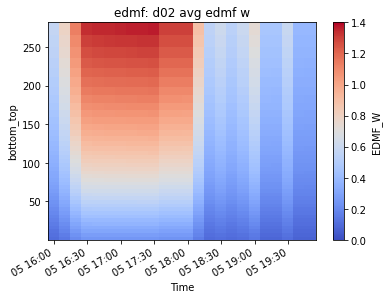

In [218]:
plot_edmfw_timeheight('2018-08-05', 'edmf', top_hgt)

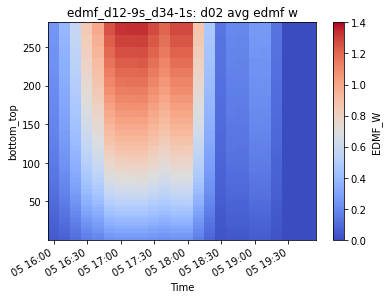

In [219]:
plot_edmfw_timeheight('2018-08-05', 'edmf_d12-9s_d34-1s', top_hgt)